## Plot FOV of the dish

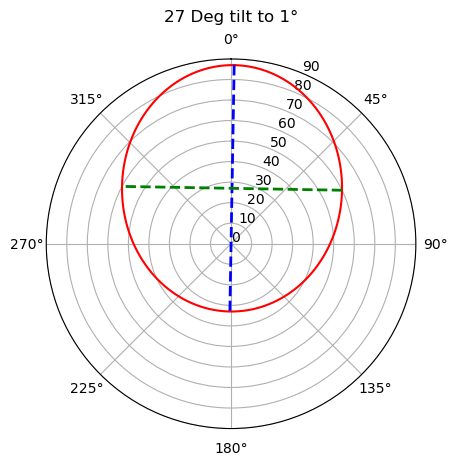

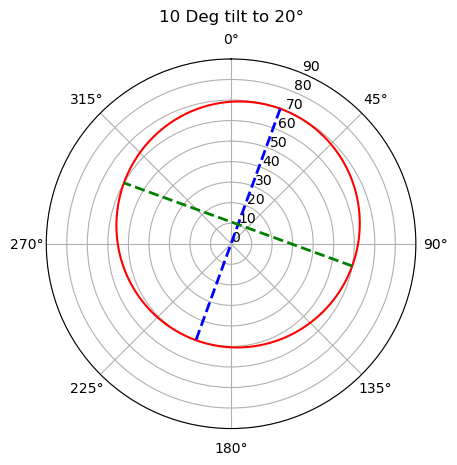

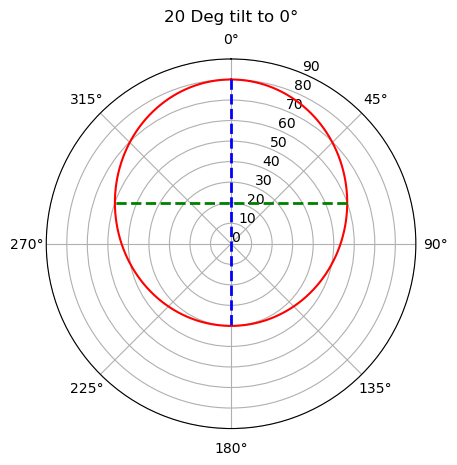

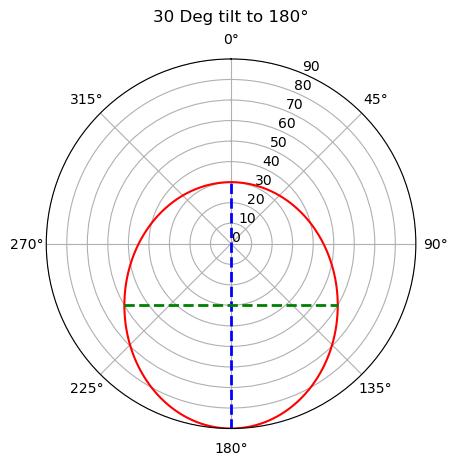

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math

def draw_fov(tilt_deg, rotation_deg=0):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    # Set up the plot limits
    ax.set_ylim(0, 90)
    ax.set_yticks(np.arange(0, 91, 10))
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.grid(True)

    # Base radius of the FOV
    base_radius = 60

    # Calculate the FOV center and axes lengths
    center_shift = tilt_deg  # Center moves up by tilt_deg units per degree of tilt
    x_radius = base_radius   # x-axis radius remains constant
    y_radius = math.sqrt(base_radius**2 - tilt_deg**2)  # y-axis radius changes with tilt

    # Calculate the points for the oval
    theta = np.linspace(0, 2 * np.pi, 300)
    x = x_radius * np.cos(theta)
    y = y_radius * np.sin(theta)

    # Adjust the center position based on tilt
    x += center_shift

    # Convert to polar coordinates
    r = np.sqrt(x**2 + y**2)
    angles = np.arctan2(y, x)

    # Rotate the oval by adding the rotation angle in radians
    rotation_radians = np.deg2rad(rotation_deg)  # Convert degrees to radians
    angles += rotation_radians

    # Plot the oval
    ax.plot(angles, r, 'r')

    # Calculate and plot the major and minor axes of the oval
    # Major axis endpoints
    major_axis_x = np.array([center_shift + x_radius, center_shift - x_radius])
    major_axis_y = np.array([0, 0])

    # Minor axis endpoints
    minor_axis_x = np.array([center_shift, center_shift])
    minor_axis_y = np.array([y_radius, -y_radius])

    # Rotate the axes
    major_axis_angles = np.arctan2(major_axis_y, major_axis_x) + rotation_radians
    major_axis_r = np.sqrt(major_axis_x**2 + major_axis_y**2)
    minor_axis_angles = np.arctan2(minor_axis_y, minor_axis_x) + rotation_radians
    minor_axis_r = np.sqrt(minor_axis_x**2 + minor_axis_y**2)

    # Plot the major and minor axes
    ax.plot(major_axis_angles, major_axis_r, 'blue', linestyle='--', linewidth=2)
    ax.plot(minor_axis_angles, minor_axis_r, 'green', linestyle='--', linewidth=2)
    # Set plot title
    ax.set_title(f'{tilt_deg} Deg tilt to {rotation_deg}°', va='bottom')
    plt.show()

# Draw FOV for different tilts with a 20 degree rotation to the right
draw_fov(27, 1)   
draw_fov(10, 20)  
draw_fov(20, 0)  
draw_fov(30, 180)  


## Add random dots 

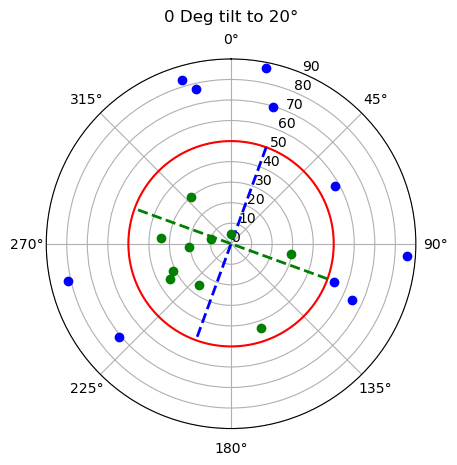

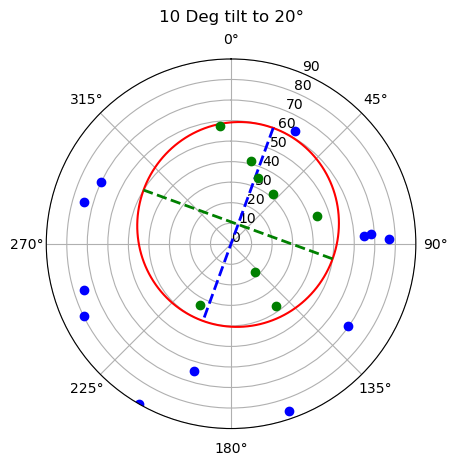

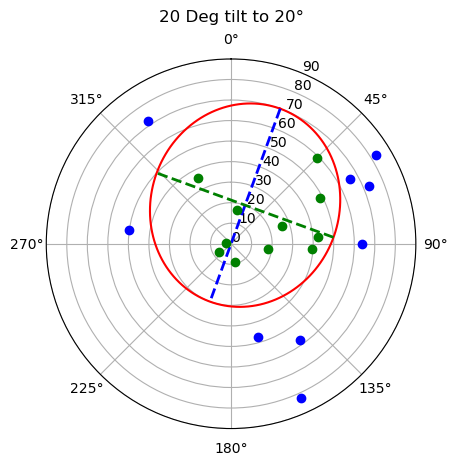

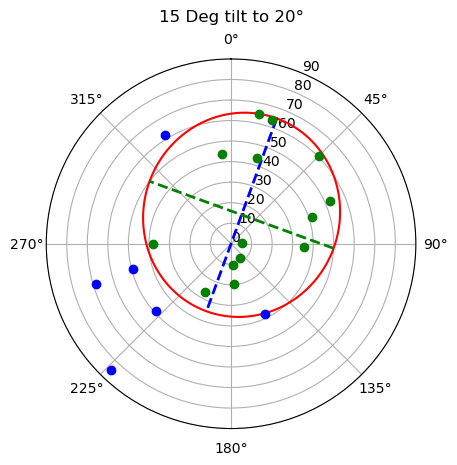

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math

def draw_fov(tilt_deg, rotation_deg=0, num_points=10):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    # Set up the plot limits
    ax.set_ylim(0, 90)
    ax.set_yticks(np.arange(0, 91, 10))
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.grid(True)

    # Base radius of the FOV
    base_radius = 50

    # Calculate the FOV center and axes lengths
    center_shift = tilt_deg  # Center moves up by tilt_deg units per degree of tilt
    x_radius = base_radius   # x-axis radius remains constant
    y_radius = math.sqrt(base_radius**2 - tilt_deg**2)  # y-axis radius changes with tilt

    # Calculate the points for the oval
    theta = np.linspace(0, 2 * np.pi, 300)
    x = x_radius * np.cos(theta)
    y = y_radius * np.sin(theta)

    # Adjust the center position based on tilt
    x += center_shift

    # Convert to polar coordinates
    r = np.sqrt(x**2 + y**2)
    angles = np.arctan2(y, x)
    
    # Rotate the oval by adding the rotation angle in radians
    rotation_radians = np.deg2rad(rotation_deg)  # Convert degrees to radians
    angles += rotation_radians

    # Plot the oval
    ax.plot(angles, r, 'r')
    # Calculate and plot the major and minor axes of the oval
    # Major axis endpoints (before rotation)
    major_axis_x = np.array([center_shift + x_radius, center_shift - x_radius])
    major_axis_y = np.array([0, 0])

    # Minor axis endpoints (before rotation)
    minor_axis_x = np.array([center_shift, center_shift])
    minor_axis_y = np.array([y_radius, -y_radius])

    # Rotate the axes
    def rotate_points(x, y, angle):
        """ Rotate points (x, y) by a given angle """
        x_rot = x * np.cos(angle) - y * np.sin(angle)
        y_rot = x * np.sin(angle) + y * np.cos(angle)
        return x_rot, y_rot

    # Rotate major axis
    major_axis_x_rot, major_axis_y_rot = rotate_points(major_axis_x, major_axis_y, rotation_radians)
    major_axis_angles = np.arctan2(major_axis_y_rot, major_axis_x_rot)
    major_axis_r = np.sqrt(major_axis_x_rot**2 + major_axis_y_rot**2)

    # Rotate minor axis
    minor_axis_x_rot, minor_axis_y_rot = rotate_points(minor_axis_x, minor_axis_y, rotation_radians)
    minor_axis_angles = np.arctan2(minor_axis_y_rot, minor_axis_x_rot)
    minor_axis_r = np.sqrt(minor_axis_x_rot**2 + minor_axis_y_rot**2)

    # Plot the major and minor axes
    ax.plot(major_axis_angles, major_axis_r, 'blue', linestyle='--', linewidth=2)
    ax.plot(minor_axis_angles, minor_axis_r, 'green', linestyle='--', linewidth=2)
    # Generate random points
    points_r = np.random.uniform(0, 90, num_points)
    points_angles = np.random.uniform(0, 2 * np.pi, num_points)

    # Check if points are inside the FOV
    inside_fov = []
    for r, angle in zip(points_r, points_angles):
        # Convert polar to Cartesian coordinates
        x_point = r * np.cos(angle)
        y_point = r * np.sin(angle)

        # Rotate points to check if they are inside the rotated FOV
        x_point_rot = x_point * np.cos(-rotation_radians) - y_point * np.sin(-rotation_radians)
        y_point_rot = x_point * np.sin(-rotation_radians) + y_point * np.cos(-rotation_radians)

        # Adjust center position based on tilt
        x_point_rot -= center_shift

        # Check if the point is inside the ellipse
        if (x_point_rot**2 / x_radius**2) + (y_point_rot**2 / y_radius**2) <= 1:
            inside_fov.append(True)
        else:
            inside_fov.append(False)

    # Plot the points
    for r, angle, inside in zip(points_r, points_angles, inside_fov):
        color = 'g' if inside else 'b'
        ax.plot(angle, r, 'o', color=color)

    # Set plot title
    ax.set_title(f'{tilt_deg} Deg tilt to {rotation_deg}°', va='bottom')

    # Display the plot
    plt.show()

# Draw FOV for different tilts with a 20 degree rotation to the right and random points
draw_fov(0, 20, num_points=20)   # 0 degrees tilt with 20 degrees rotation
draw_fov(10, 20, num_points=20)  # 10 degrees tilt with 20 degrees rotation
draw_fov(20, 20, num_points=20)  # 20 degrees tilt with 20 degrees rotation
draw_fov(15, 20, num_points=20)  # 15 degrees tilt with 20 degrees rotation


## Add Satellites

Loaded 5961 satellites
0
STARLINK-1047 catalog #44752 epoch 2024-05-15 20:23:26 UTC
[ 592.95636467 -184.61898087  599.97499099]
Elevation:  3.69111e-06 au
Azimuth: 297.8267589400695 degrees
Altitude: 36.83444652525389 degrees
Distance: 863.5110933348101 kilometers
Rise Time: 2024-05-15T20:51:08Z
Set Time: 2024-05-15T20:51:08Z
1
STARLINK-1168 catalog #45072 epoch 2024-05-15 20:31:22 UTC
[-198.65361342  281.74400252  579.40491053]
Elevation:  3.68865e-06 au
Azimuth: 49.22242712720062 degrees
Altitude: 53.228740983423684 degrees
Distance: 674.2054519445262 kilometers
Rise Time: 2024-05-15T20:51:08Z
Set Time: 2024-05-15T20:51:08Z
2
STARLINK-1137 catalog #45092 epoch 2024-05-15 20:28:43 UTC
[  4.42920012 -55.0789349  753.22408068]
Elevation:  3.69309e-06 au
Azimuth: 357.0898516104291 degrees
Altitude: 44.746684670403575 degrees
Distance: 755.2481860961991 kilometers
Rise Time: 2024-05-15T20:51:08Z
Set Time: 2024-05-15T20:51:08Z
3
STARLINK-1493 catalog #45759 epoch 2024-05-15 17:11:01 UTC
[-

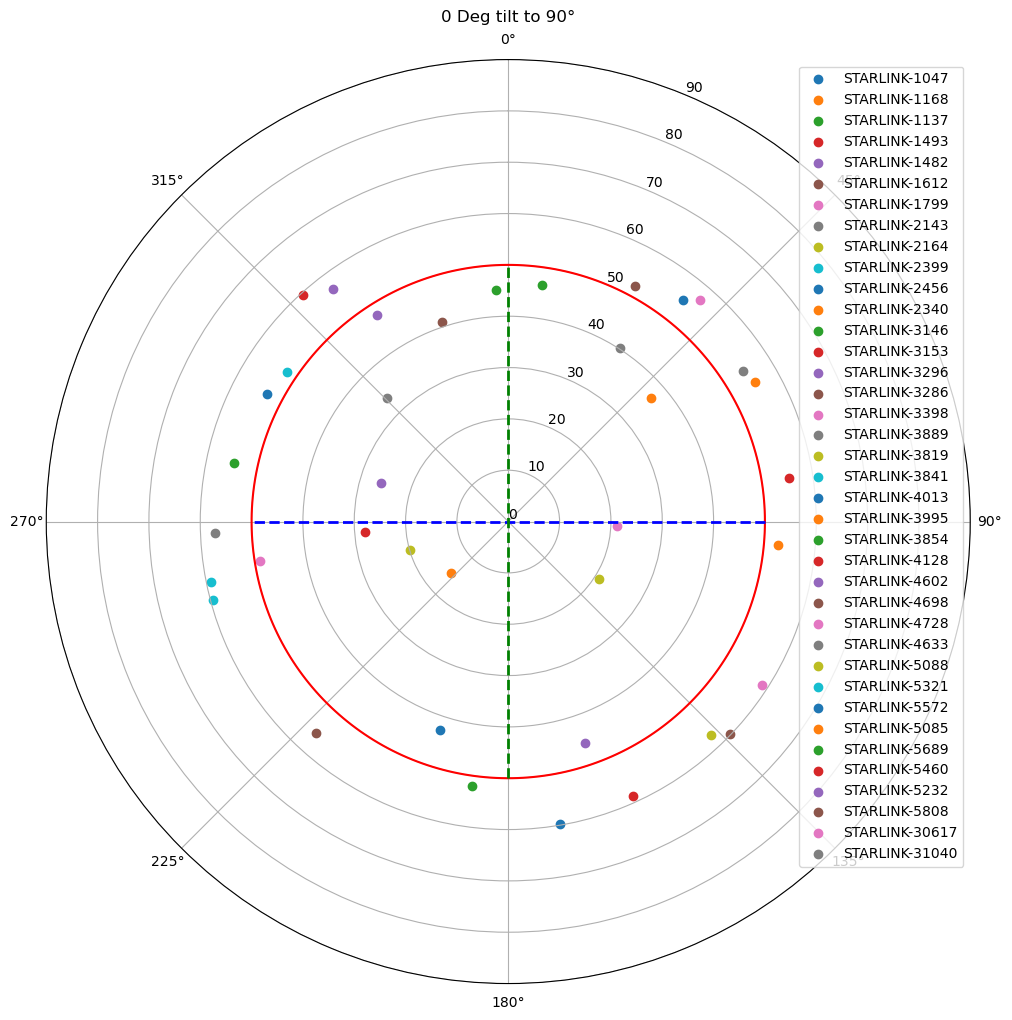

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import math

def load_data():
    stations_url = 'https://celestrak.org/NORAD/elements/gp.php?GROUP=starlink&FORMAT=tle'
    satellites = load.tle_file(stations_url)
    print('Loaded', len(satellites), 'satellites')
    

def draw_fov(tilt_deg, rotation_deg,all_trace, all_sat):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(12, 12))

    # Set up the plot limits
    ax.set_ylim(0, 90)
    ax.set_yticks(np.arange(0, 91, 10))
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.grid(True)

    # Base radius of the FOV
    base_radius = 50

    # Calculate the FOV center and axes lengths
    center_shift = tilt_deg  # Center moves up by tilt_deg units per degree of tilt
    x_radius = base_radius   # x-axis radius remains constant
    y_radius = math.sqrt(base_radius**2 - tilt_deg**2)  # y-axis radius changes with tilt

    # Calculate the points for the oval
    theta = np.linspace(0, 2 * np.pi, 300)
    x = x_radius * np.cos(theta)
    y = y_radius * np.sin(theta)

    # Adjust the center position based on tilt
    x += center_shift

    # Convert to polar coordinates
    r = np.sqrt(x**2 + y**2)
    angles = np.arctan2(y, x)
    
    # Rotate the oval by adding the rotation angle in radians
    rotation_radians = np.deg2rad(rotation_deg)  # Convert degrees to radians
    angles += rotation_radians

    # Plot the oval
    ax.plot(angles, r, 'r')
    # Calculate and plot the major and minor axes of the oval
    # Major axis endpoints (before rotation)
    major_axis_x = np.array([center_shift + x_radius, center_shift - x_radius])
    major_axis_y = np.array([0, 0])

    # Minor axis endpoints (before rotation)
    minor_axis_x = np.array([center_shift, center_shift])
    minor_axis_y = np.array([y_radius, -y_radius])

    # Rotate the axes
    def rotate_points(x, y, angle):
        """ Rotate points (x, y) by a given angle """
        x_rot = x * np.cos(angle) - y * np.sin(angle)
        y_rot = x * np.sin(angle) + y * np.cos(angle)
        return x_rot, y_rot

    # Rotate major axis
    major_axis_x_rot, major_axis_y_rot = rotate_points(major_axis_x, major_axis_y, rotation_radians)
    major_axis_angles = np.arctan2(major_axis_y_rot, major_axis_x_rot)
    major_axis_r = np.sqrt(major_axis_x_rot**2 + major_axis_y_rot**2)

    # Rotate minor axis
    minor_axis_x_rot, minor_axis_y_rot = rotate_points(minor_axis_x, minor_axis_y, rotation_radians)
    minor_axis_angles = np.arctan2(minor_axis_y_rot, minor_axis_x_rot)
    minor_axis_r = np.sqrt(minor_axis_x_rot**2 + minor_axis_y_rot**2)

    # Plot the major and minor axes
    ax.plot(major_axis_angles, major_axis_r, 'blue', linestyle='--', linewidth=2)
    ax.plot(minor_axis_angles, minor_axis_r, 'green', linestyle='--', linewidth=2)
    for trace, sat in zip(all_trace, all_sat):
        trace = np.array(trace)
        ax.scatter(trace[:, 1], trace[:, 0], label=sat.name)    
    # Set plot title
    ax.set_title(f'{tilt_deg} Deg tilt to {rotation_deg}°', va='bottom')

    # Display the plot
    plt.legend()
    plt.show()

load_data()
ts = load.timescale()
initial_time = ts.utc(2024, 5, 15, 20, 51, 8)
# t = ts.now()
t = initial_time
count = 0

your_latitude = 48.4284  # Latitude in decimal degrees
your_longitude = -123.3656  # Longitude in decimal degrees

bluffton = wgs84.latlon(your_latitude, your_longitude)
observer_location = Topos(latitude_degrees=your_latitude, longitude_degrees=your_longitude, elevation_m=22)

all_trace = []
all_sat = []

for satellite in satellites:
    sat_trace = []
    
    difference = satellite - bluffton
    topocentric = difference.at(t)

    alt, az, distance = topocentric.altaz()
    ele = wgs84.height_of(satellite.at(t))

    utc_iso_str = t.utc_iso()
    
    if alt.degrees > 30:
        sat_trace.append((90 - alt.degrees, np.radians(az.degrees)))
        all_trace.append(sat_trace)
        all_sat.append(satellite)
        print(count)
        print(satellite)
        print(topocentric.position.km)
        print('Elevation: ', ele)
        print(f"Azimuth: {az.degrees} degrees")
        print(f"Altitude: {alt.degrees} degrees")
        print(f"Distance: {distance.km} kilometers")
        print(f"Rise Time: {utc_iso_str}")
        print(f"Set Time: {utc_iso_str}")
        count += 1
# Draw FOV for different tilts with a 20 degree rotation to the right and random points
draw_fov(0, 90, all_trace, all_sat)   # 0 degrees tilt with 20 degrees rotation




## Plot with sat name

Loaded 5961 satellites
STARLINK-1009 catalog #44715 epoch 2024-05-15 18:08:03 UTC at Azimuth: 22.909383267376818°, Altitude: 57.7994355162533°, Distance: 642.3678195946696 km
STARLINK-1031 catalog #44736 epoch 2024-05-15 16:35:11 UTC at Azimuth: 35.576126001557284°, Altitude: 36.33066766722939°, Distance: 872.9131915294952 km
STARLINK-1062 catalog #44767 epoch 2024-05-15 19:49:01 UTC at Azimuth: 1.04344265351705°, Altitude: 55.31698872629571°, Distance: 665.0628557061532 km
STARLINK-1262 catalog #45366 epoch 2024-05-15 18:05:24 UTC at Azimuth: 246.1886995092883°, Altitude: 54.93412902913393°, Distance: 660.7796254933286 km
STARLINK-1464 catalog #45751 epoch 2024-05-15 11:52:33 UTC at Azimuth: 303.75137453172727°, Altitude: 32.37548370148282°, Distance: 945.1657206540358 km
STARLINK-1489 catalog #45776 epoch 2024-05-15 19:52:09 UTC at Azimuth: 335.0035716721731°, Altitude: 40.58392485183471°, Distance: 779.0975946140655 km
STARLINK-1682 catalog #46577 epoch 2024-05-15 14:52:20 UTC at Az

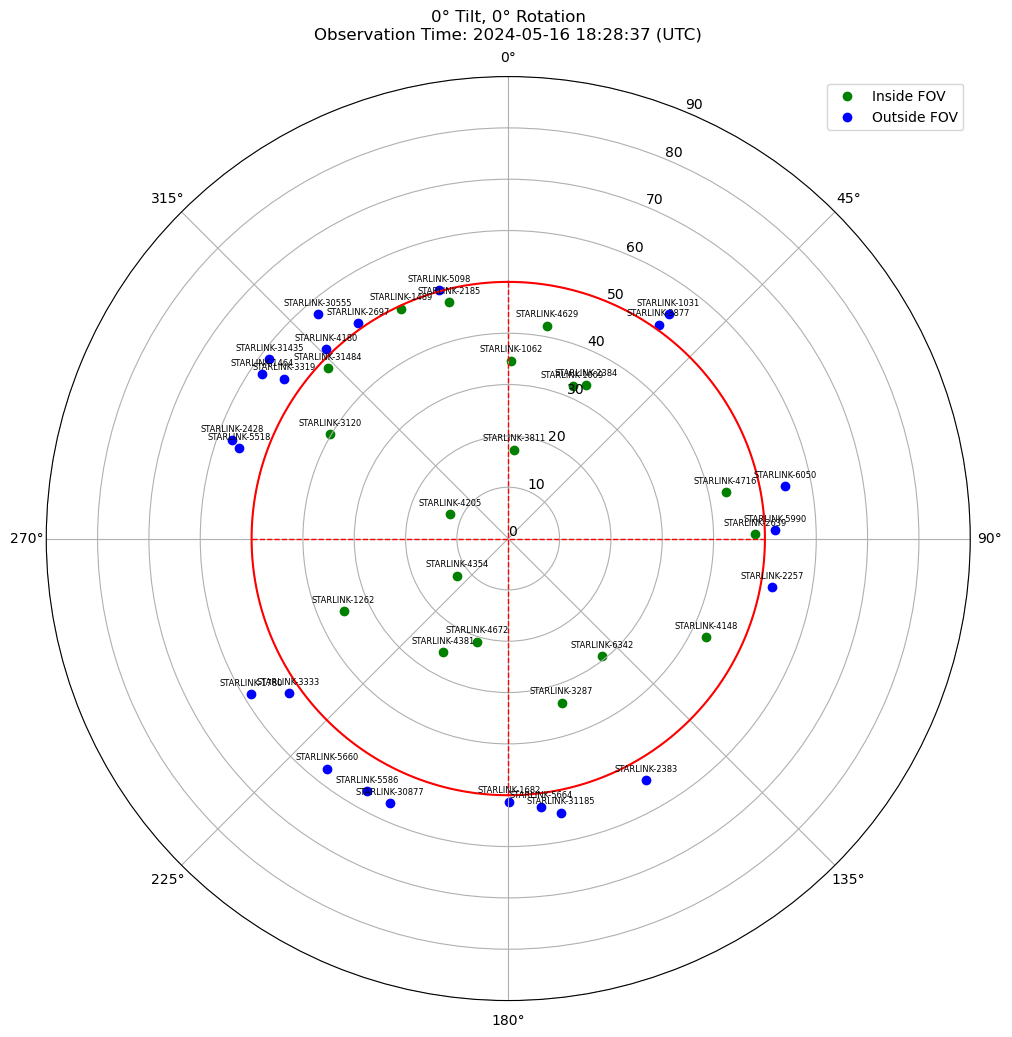

Satellites inside the FOV: ['STARLINK-1009', 'STARLINK-1062', 'STARLINK-1262', 'STARLINK-1489', 'STARLINK-2185', 'STARLINK-2384', 'STARLINK-2639', 'STARLINK-3120', 'STARLINK-3287', 'STARLINK-3811', 'STARLINK-4205', 'STARLINK-4381', 'STARLINK-4354', 'STARLINK-4148', 'STARLINK-4672', 'STARLINK-4716', 'STARLINK-4629', 'STARLINK-6342', 'STARLINK-31484']


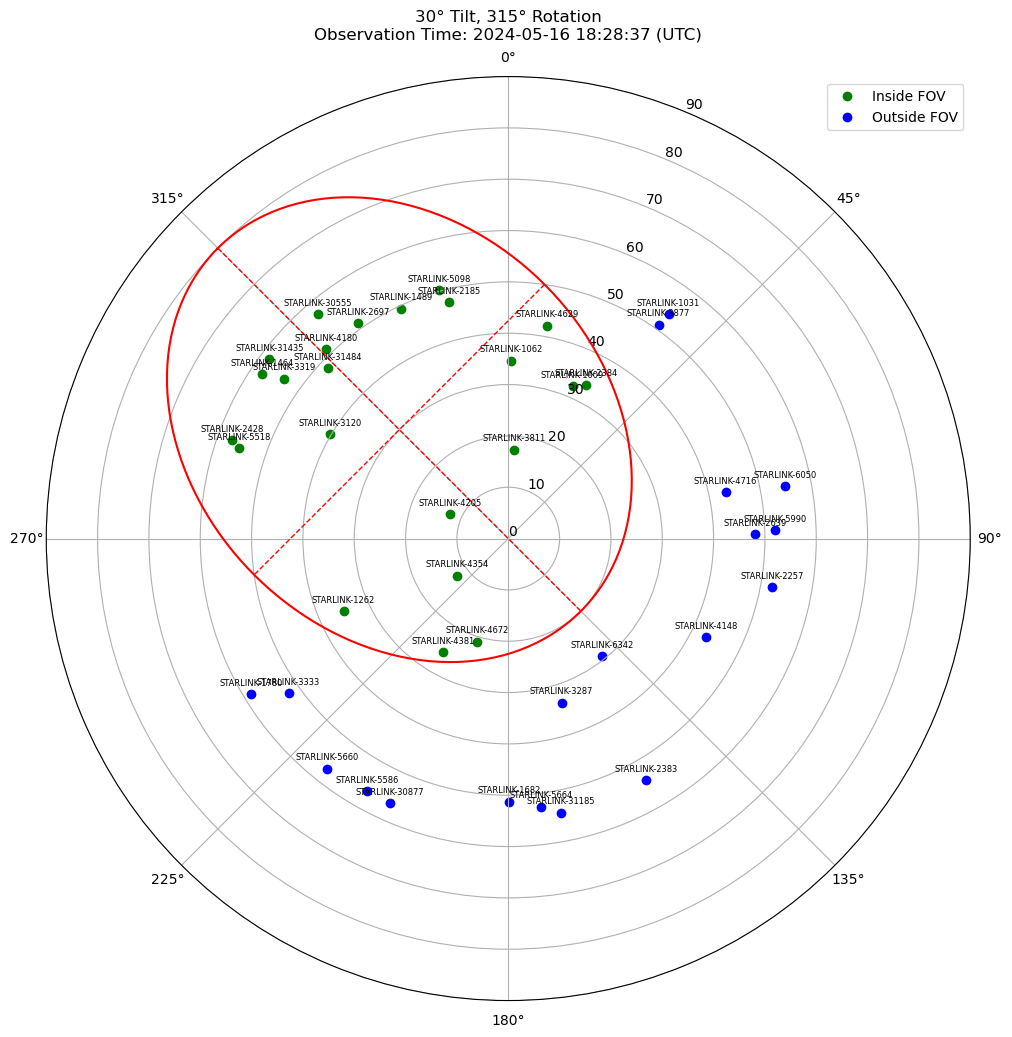

Satellites inside the FOV: ['STARLINK-1009', 'STARLINK-1062', 'STARLINK-1262', 'STARLINK-1464', 'STARLINK-1489', 'STARLINK-2185', 'STARLINK-2384', 'STARLINK-2428', 'STARLINK-2697', 'STARLINK-3120', 'STARLINK-3319', 'STARLINK-3811', 'STARLINK-4205', 'STARLINK-4381', 'STARLINK-4354', 'STARLINK-4180', 'STARLINK-4672', 'STARLINK-4629', 'STARLINK-5098', 'STARLINK-5518', 'STARLINK-30555', 'STARLINK-31435', 'STARLINK-31484']


In [36]:
from skyfield.api import load, wgs84, Topos
import matplotlib.pyplot as plt
import numpy as np
import math

def load_data():
    stations_url = 'https://celestrak.org/NORAD/elements/gp.php?GROUP=starlink&FORMAT=tle'
    satellites = load.tle_file(stations_url)
    print('Loaded', len(satellites), 'satellites')
    return satellites

def set_observation_time(year, month, day, hour, minute, second):
    ts = load.timescale()
    return ts.utc(year, month, day, hour, minute, second)

def calculate_satellite_positions(satellites, observer_location, observation_time):
    locations = []
    sats = []
    min_elevation = 30
    for satellite in satellites:
        difference = satellite - observer_location
        topocentric = difference.at(observation_time)
        alt, az, distance = topocentric.altaz()
        if alt.degrees > min_elevation:
            loc = [(90 - alt.degrees, np.radians(az.degrees))]
            locations.append(loc)
            sats.append(satellite)
            print(f"{satellite} at Azimuth: {az.degrees}°, Altitude: {alt.degrees}°, Distance: {distance.km} km")
    return locations, sats

def rotate_points(x, y, angle):
    x_rot = x * np.cos(angle) - y * np.sin(angle)
    y_rot = x * np.sin(angle) + y * np.cos(angle)
    return x_rot, y_rot

def draw_fov(tilt_deg, rotation_deg, locations, sats, observation_time):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(12, 12))

    # Plot settings
    ax.set_ylim(0, 90)
    ax.set_yticks(np.arange(0, 91, 10))
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.grid(True)

    # FOV ellipse
    base_radius = 50
    center_shift = tilt_deg
    x_radius = base_radius
    y_radius = math.sqrt(base_radius**2 - tilt_deg**2)

    theta = np.linspace(0, 2 * np.pi, 300)
    x = x_radius * np.cos(theta) + center_shift
    y = y_radius * np.sin(theta)
    r = np.sqrt(x**2 + y**2)
    angles = np.arctan2(y, x) + np.deg2rad(rotation_deg)
    ax.plot(angles, r, 'r')

    # Plot major and minor axes
    major_axis_x = np.array([center_shift + x_radius, center_shift - x_radius])
    major_axis_y = np.array([0, 0])
    minor_axis_x = np.array([center_shift, center_shift])
    minor_axis_y = np.array([y_radius, -y_radius])
    major_axis_x_rot, major_axis_y_rot = rotate_points(major_axis_x, major_axis_y, np.deg2rad(rotation_deg))
    minor_axis_x_rot, minor_axis_y_rot = rotate_points(minor_axis_x, minor_axis_y, np.deg2rad(rotation_deg))
    ax.plot(np.arctan2(major_axis_y_rot, major_axis_x_rot), np.sqrt(major_axis_x_rot**2 + major_axis_y_rot**2), 'red', linestyle='--', linewidth=1)
    ax.plot(np.arctan2(minor_axis_y_rot, minor_axis_x_rot), np.sqrt(minor_axis_x_rot**2 + minor_axis_y_rot**2), 'red', linestyle='--', linewidth=1)

    inside_fov = []

    # Plot satellites
    for loc, sat in zip(locations, sats):
        loc = np.array(loc)
        r = loc[:, 0]
        angle = loc[:, 1]
        inside = False
        for r_i, angle_i in zip(r, angle):
            x_point = r_i * np.cos(angle_i)
            y_point = r_i * np.sin(angle_i)
            x_point_rot, y_point_rot = rotate_points(x_point, y_point, -np.deg2rad(rotation_deg))
            x_point_rot -= center_shift
            if (x_point_rot**2 / x_radius**2) + (y_point_rot**2 / y_radius**2) <= 1:
                inside = True
                break
        if inside:
            ax.scatter(angle, r, color="g", label="Inside FOV")
            inside_fov.append(sat.name)
        else:
            ax.scatter(angle, r, color="b", label="Outside FOV")
        ax.annotate(sat.name, xy=(angle, r), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=6, bbox=dict(boxstyle='round,pad=0.5', edgecolor='none', facecolor='none', alpha=0.6))

    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right')
    
    # Format the observation time
    observation_time_str = observation_time.utc_strftime('%Y-%m-%d %H:%M:%S (UTC)')
    ax.set_title(f'{tilt_deg}° Tilt, {rotation_deg}° Rotation\nObservation Time: {observation_time_str}', va='bottom')
    
    plt.show()
    print("Satellites inside the FOV:", inside_fov)

if __name__ == "__main__":
    satellites = load_data()
    initial_time = set_observation_time(2024, 5, 16, 18, 28, 37)
    observer_location = Topos(latitude_degrees=48.4284, longitude_degrees=-123.3656, elevation_m=22)
    locations, sats = calculate_satellite_positions(satellites, observer_location, initial_time)
    draw_fov(0, 0, locations, sats, initial_time)
    draw_fov(30, 315, locations, sats, initial_time)
